# Logistic Regression : Single-variable

In [1]:
import numpy as np

In [2]:
loaded_data = np.loadtxt('data-02_1var.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

print("X_data = ", x_data.shape, ", t_data.shape = ", t_data.shape)

X_data =  (10, 1) , t_data.shape =  (10, 1)


In [3]:
W = np.random.rand(1, 1)
b = np.random.rand(1)

print('W = ', W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.66730098]] , W.shape =  (1, 1) , b =  [0.70010467] , b.shape =  (1,)


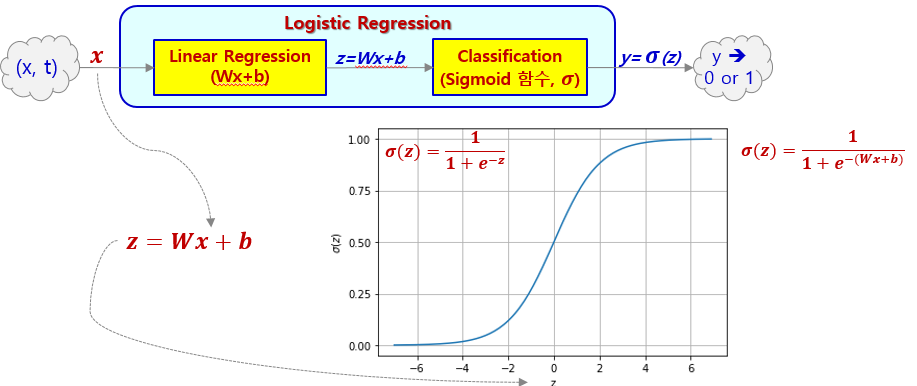

In [4]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [5]:
def cross_entropy(t, y):    # 크로스 엔트로피 함수
    delta = 1e-7        # log함수의 -무한대 발산 방지
    return -np.sum(t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta))

In [6]:
def errFunc(x, t):
    z = np.dot(x,W) + b     # 선형회귀
    y = sigmoid(z)
    return cross_entropy(t, y)

In [7]:
def errValue(x, t):
    return  errFunc(x, t)  

In [8]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
            
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index        
        temp = x[idx]
        x[idx] = temp + delta_x
        fx1 = f(x)  # f(x+delta_x)
        
        x[idx] = temp - delta_x 
        fx2 = f(x)  # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = temp 
        it.iternext()   
    return grad

In [9]:
def predict(x):
    z = np.dot(x,W) + b
    y = sigmoid(z)
    if y > 0.5:
        result = 1  # True
    else:
        result = 0  # False
    return y, result

In [10]:
learning_rate = 1e-2
f = lambda x : errFunc(x_data,t_data)   # errFunc()함수를 다른 함수의 인자로 넘기기 위해 

print("Initial error value = {:.3f}".format(errValue(x_data, t_data)))
print("Initial W = ", W.reshape(1,-1).round(3))
print("Initial b = ", b.round(3))
for step in range(10001):        # 적당한 횟수만큼 경사하강 반복
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)

    if (step % 1000 == 0):       # 경사하강 반복 중간마다 손실값 출력
        print("Step = {:<5d}".format(step), "Error Value = {:.4f}".format(errValue(x_data, t_data)),
              "W =", W.reshape(1,-1).round(3), " b = ", b.round(3))

Initial error value = 32.395
Initial W =  [[0.667]]
Initial b =  [0.7]
Step = 0     Error Value = 15.1840 W = [[0.252]]  b =  [0.646]
Step = 1000  Error Value = 1.6301 W = [[0.495]]  b =  [-6.201]
Step = 2000  Error Value = 1.2350 W = [[0.644]]  b =  [-8.173]
Step = 3000  Error Value = 1.0471 W = [[0.747]]  b =  [-9.54]
Step = 4000  Error Value = 0.9295 W = [[0.83]]  b =  [-10.623]
Step = 5000  Error Value = 0.8460 W = [[0.899]]  b =  [-11.536]
Step = 6000  Error Value = 0.7821 W = [[0.96]]  b =  [-12.335]
Step = 7000  Error Value = 0.7309 W = [[1.014]]  b =  [-13.05]
Step = 8000  Error Value = 0.6885 W = [[1.064]]  b =  [-13.7]
Step = 9000  Error Value = 0.6525 W = [[1.11]]  b =  [-14.3]
Step = 10000 Error Value = 0.6213 W = [[1.153]]  b =  [-14.858]


In [11]:
(real_val, logical_val) = predict(8)
print(real_val, logical_val)

[[0.00354734]] 0


# Logistic Regression : Multi-variable

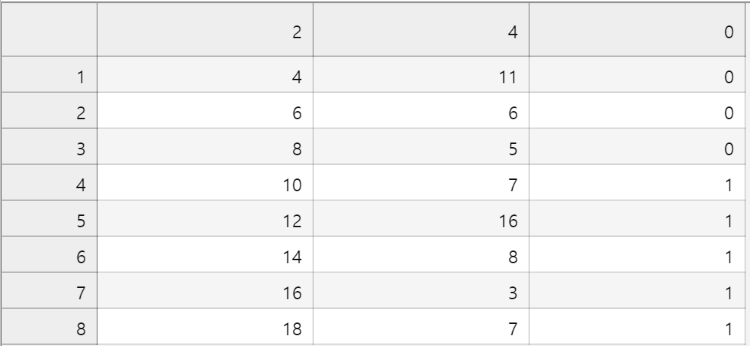

In [12]:
loaded_data = np.loadtxt('data-02_2var.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

print("X_data = ", x_data.shape, ", t_data.shape = ", t_data.shape)

X_data =  (9, 2) , t_data.shape =  (9, 1)


In [13]:
W = np.random.rand(2, 1)
b = np.random.rand(1)

print('W = ', W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.44452595]
 [0.71283793]] , W.shape =  (2, 1) , b =  [0.08291966] , b.shape =  (1,)


In [14]:
learning_rate = 1e-2
f = lambda x : errFunc(x_data,t_data)   # errFunc()함수를 다른 함수의 인자로 넘기기 위해 

print("Initial error value = {:.3f}".format(errValue(x_data, t_data)))
print("Initial W = ", W.reshape(1,-1).round(3))
print("Initial b = ", b.round(3))
for step in range(10001):        # 적당한 횟수만큼 경사하강 반복
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)

    if (step % 1000 == 0):       # 경사하강 반복 중간마다 손실값 출력
        print("Step = {:<5d}".format(step), "Error Value = {:.4f}".format(errValue(x_data, t_data)),
              "W =", W.reshape(1,-1).round(3), " b = ", b.round(3))

Initial error value = 27.778
Initial W =  [[0.445 0.713]]
Initial b =  [0.083]
Step = 0     Error Value = 17.0150 W = [[0.245 0.454]]  b =  [0.044]
Step = 1000  Error Value = 1.3789 W = [[ 0.592 -0.003]]  b =  [-4.982]
Step = 2000  Error Value = 0.9655 W = [[0.759 0.056]]  b =  [-6.991]
Step = 3000  Error Value = 0.7853 W = [[0.875 0.096]]  b =  [-8.326]
Step = 4000  Error Value = 0.6774 W = [[0.965 0.13 ]]  b =  [-9.361]
Step = 5000  Error Value = 0.6024 W = [[1.038 0.162]]  b =  [-10.224]
Step = 6000  Error Value = 0.5456 W = [[1.1   0.193]]  b =  [-10.976]
Step = 7000  Error Value = 0.5002 W = [[1.153 0.224]]  b =  [-11.647]
Step = 8000  Error Value = 0.4627 W = [[1.201 0.255]]  b =  [-12.258]
Step = 9000  Error Value = 0.4309 W = [[1.243 0.285]]  b =  [-12.821]
Step = 10000 Error Value = 0.4034 W = [[1.282 0.314]]  b =  [-13.343]


In [15]:
test_data = np.array([18, 7]) # (예습, 복습) = (3, 17) => Fail (0)
predict(test_data)

(array([0.99999339]), 1)